In [22]:
import h5py
import matplotlib
import os

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Year_in_Second = 365*24*3600

In [23]:
plt.rcParams.update({
    'axes.titlesize': 16,        # Main title
    'axes.labelsize': 14,        # Axis labels
    'xtick.labelsize': 12,       # X-axis tick labels
    'ytick.labelsize': 12,       # Y-axis tick labels
    'legend.fontsize': 12,       # Legend text
    'figure.titlesize': 18       # Figure-level suptitle
})

In [24]:
ResultFile = './Results/Result.jld2' 

In [25]:
with h5py.File(ResultFile) as file:
    # print(file.keys())
    History_Time = np.array(file["History_Time"]).T
    History_Time = History_Time.reshape( (len(History_Time), ) )
    History_V = np.array( file["History_V"] ).T
    History_Friction = np.array( file["History_Friction"] ).T
    History_NormalStress = np.array(file["History_NormalStress"]).T
    History_Disp = np.array(file["History_Disp"]).T
    History_Theta = np.array(file["History_Theta"]).T

# %%
with h5py.File("./Input_ExternalStressChange.jld2") as file:
    # print(file.keys())
    ExternalStress_TimeArray = np.array(file["ExternalStress_TimeArray"])
    ExternalStress_Normal = np.array(file["ExternalStress_Normal"]).T
    ExternalStress_Shear = np.array(file["ExternalStress_Shear"]).T
    
    PorePressureChange= np.array( file["PorePressureChange"] ).T
    
    
with h5py.File("./Input_Discretized.jld2") as file:
    # print(file.keys())
    FaultCenter = np.array( file["FaultCenter"] ).T
    FaultLengthStrike = np.array(file["FaultLengthStrike"]) 
    FaultLengthDip = np.array(file["FaultLengthDip"])
    FaultStrikeAngle = np.array(file["FaultStrikeAngle"]) 
    FaultDipAngle = np.array(file["FaultDipAngle"]) 
    FaultLLRR = np.array(file["FaultLLRR"])

In [26]:
def get_rupture_start_timestep():
    for i in range(len(History_Time)):
        if np.linalg.norm(History_Disp[i]) > 1e-3:
            return i
    return None

Rupture time is  9.923963566510924  years
Interpolated Pore pressure is  -30.0 MPa


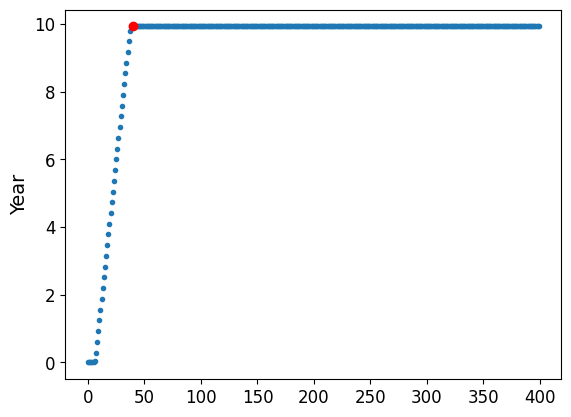

In [27]:
plt.plot( History_Time/Year_in_Second, '.' )

idx_rupture = get_rupture_start_timestep() + 2
print("Rupture time is ", History_Time[idx_rupture]/Year_in_Second, " years")

idx_rupture_External = np.argmin( np.abs(ExternalStress_TimeArray - History_Time[idx_rupture]) ) 

print("Interpolated Pore pressure is ", 1e-6 * min( PorePressureChange[idx_rupture_External] ), "MPa")

plt.plot( idx_rupture, History_Time[idx_rupture]/Year_in_Second,  'ro' )
plt.ylabel('Year');

In [28]:
def get_center_line(faultcenter):
    idx_CLine = np.where(  faultcenter[:,1] == 995. )[0]
    return idx_CLine, faultcenter[idx_CLine]

idx_CenterLine, CenterLine = get_center_line(FaultCenter)

Text(0, 0.5, 'Z (m)')

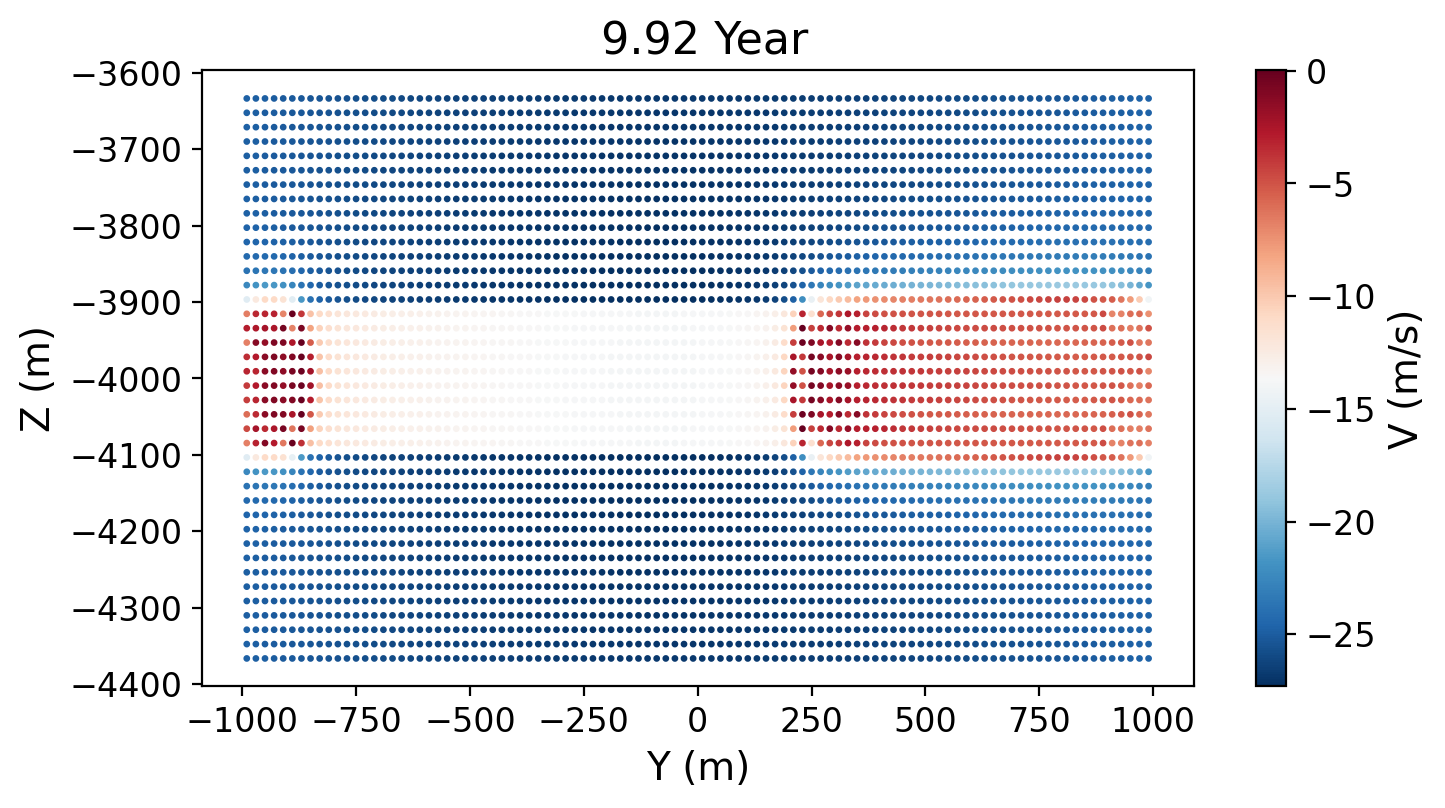

In [ ]:
idx_endtime = idx_rupture + 300

fig = plt.figure(figsize=(8,4), dpi=200)
ax1 = fig.add_subplot(111)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2],  s = 2.0, 
                  c = np.log10( History_V[idx_endtime,:] ), cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label("Log10(V) (m/s)")
plt.title(f'{History_Time[idx_endtime]/Year_in_Second : .2f} Year');
plt.xlabel("Y (m)")
plt.ylabel("Z (m)")